In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [16]:
df = pd.read_csv("laptop_price.csv", encoding="latin1")

__EXPLORATORY DATA  ANALYSIS__

In [13]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [6]:
types.value_counts()

object     10
float64     2
int64       1
dtype: int64

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
duplicated.value_counts()

False    1303
dtype: int64

In [9]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

FEATURES TYPES CHANGES

I can change some features types --> Ram and Weight

In [17]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df["Ram"] = df["Ram"].astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '')
df["Weight"] = df["Weight"].astype(float)

In [18]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

NUMERICAL AND CATEGORICAL DATA SET CREATION

In [19]:
numerical = df.select_dtypes(include=[np.number])
numerical.drop(columns = ["laptop_ID", "Price_euros"], inplace = True)
categorical = df.select_dtypes(include=['object'])

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


OUTLIERS DETECTION

For all the outliers not aberrant values found

In [20]:
for features in numerical:
    r = numerical[features]
    print(features)
    q1 = r.quantile(0.25)
    print("q1 is", q1)
    q3 = r.quantile(0.75)
    print("q3 is", q3)
    iqr = q3 - q1
    print("iqr is", iqr)
    feature_lower = q1 - 1.5 * iqr
    print("ram lower is", feature_lower)
    feature_upper = q3 + 1.5 * iqr
    print("ram upper is", feature_lower)
    outliers_feature = dict(r[(r < feature_lower) | (r > feature_upper)])

Inches
q1 is 14.0
q3 is 15.6
iqr is 1.5999999999999996
ram lower is 11.600000000000001
ram upper is 11.600000000000001
Ram
q1 is 4.0
q3 is 8.0
iqr is 4.0
ram lower is -2.0
ram upper is -2.0
Weight
q1 is 1.5
q3 is 2.3
iqr is 0.7999999999999998
ram lower is 0.30000000000000027
ram upper is 0.30000000000000027


FEATURES DISTRIBUTION

In [24]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [27]:
skew(numerical)
#Inches , Ram,  Weight

array([-0.44639852,  2.68371225,  1.14364441])

In [28]:
kurtosis(numerical)
#Inches , Ram,  Weight

array([-0.07415664, 15.27312276,  2.44186486])

FEATURES RELATIONSHIP WITH TARGET

No normaly distributed values

In [94]:
for features in numerical:
    from scipy.stats import spearmanr
    rho, p = spearmanr(numerical[features], df['Price_euros'])
    print(features)
    print('rho=%.3f, p=%.3f' % (rho, p))
    if rho > 0:
        print("Positive relationship")
    if rho < 0:
        print("Negative relationship")
    if p > 0.05:
    	print('Probably independent')
    else:
    	print('Probably dependent')

Inches
rho=-0.047, p=0.092
Negative relationship
Probably independent
Ram
rho=0.769, p=0.000
Positive relationship
Probably dependent
Weight
rho=-0.024, p=0.390
Negative relationship
Probably independent


In [136]:
for features in categorical:
    from scipy.stats import kendalltau
    x = categorical[features]
    y = df["Price_euros"]
    coef, p = kendalltau(x, y)
    print(features)
    print('Kendall correlation coefficient: %.3f' % coef)
    alpha = 0.05
    if p > alpha:
    	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
    	print('Samples are correlated (reject H0) p=%.3f' % p)

Company
Kendall correlation coefficient: 0.112
Samples are correlated (reject H0) p=0.000
Product
Kendall correlation coefficient: 0.159
Samples are correlated (reject H0) p=0.000
TypeName
Kendall correlation coefficient: -0.006
Samples are uncorrelated (fail to reject H0) p=0.787
ScreenResolution
Kendall correlation coefficient: 0.342
Samples are correlated (reject H0) p=0.000
Cpu
Kendall correlation coefficient: 0.444
Samples are correlated (reject H0) p=0.000
Memory
Kendall correlation coefficient: 0.155
Samples are correlated (reject H0) p=0.000
Gpu
Kendall correlation coefficient: 0.368
Samples are correlated (reject H0) p=0.000
OpSys
Kendall correlation coefficient: 0.285
Samples are correlated (reject H0) p=0.000


__FEATURE PRE-PROCESSING / FEATURE ENGINEERING__

FEATURES ENCODING

In [97]:
for features in df:
    from sklearn import preprocessing  
    encoder = preprocessing.LabelEncoder()
    if df[features].dtypes == "object":
        df[features] = encoder.fit_transform(df[features])

FEATURES SCALING

In [98]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = df[['Inches', 'Ram', 'Weight']]
scaled = scaler.fit_transform(scaled)
name_scaled = columns_to_use = ['Inches', 'Ram', 'Weight']
scaled = pd.DataFrame(scaled, columns=name_scaled)
df.drop(columns = ['Inches', 'Ram', 'Weight'], inplace = True)
df = pd.concat([df, scaled], axis = 1)

__TRAIN / TEST SPLIT__

In [99]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ["Price_euros"])
y = df["Price_euros"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4)

__MODELISATION__

DECISION TREE REGRESSOR

In [100]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dt.score(xtrain, ytrain)

1.0

In [101]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, xtrain, ytrain, cv = 5, scoring = "r2").mean()

0.6510638945545955

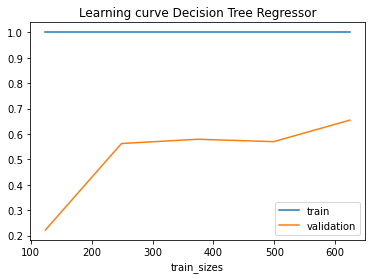

In [102]:
from sklearn.model_selection import learning_curve
n, train_score, val_score = learning_curve(dt, xtrain, ytrain, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5, scoring = 'r2')
plt.plot(n, train_score.mean(axis = 1), label = "train")
plt.plot(n, val_score.mean(axis = 1), label = "validation")
plt.title("Learning curve Decision Tree Regressor")
plt.xlabel("train_sizes")
plt.legend()

In [103]:
pred = dt.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.6539851117340928

POST PRUNING

In [104]:
path = dt.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

dt_pruned = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(xtrain, ytrain)
    dt_pruned.append(dt)
print("Previous tree number of nodes: {} with ccp_alpha: {}".format(
      dt_pruned[-1].tree_.node_count, ccp_alphas[-1]))

Previous tree number of nodes: 3 with ccp_alpha: 159901.5285528315


In [105]:
train_scores = [dt.score(xtrain, ytrain) for dt in dt_pruned]
test_scores = [dt.score(xtest, ytest) for dt in dt_pruned]

ACCURACY VS ALPHA

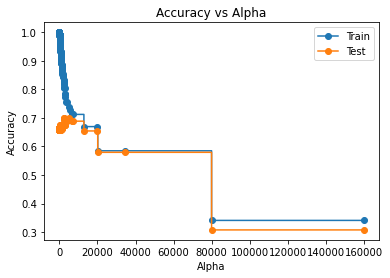

In [107]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="Train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Test",
        drawstyle="steps-post")
ax.legend()
plt.show()

RE TRAINING OF THE MODEL POST PRUNING

In [108]:
dt = DecisionTreeRegressor(random_state=0, ccp_alpha=19000)
dt.fit(xtrain, ytrain)
dt.score(xtrain, ytrain)

0.6694510620760845

In [109]:
cross_val_score(dt, xtrain, ytrain, cv = 5, scoring = "r2").mean()

0.5662128353706789

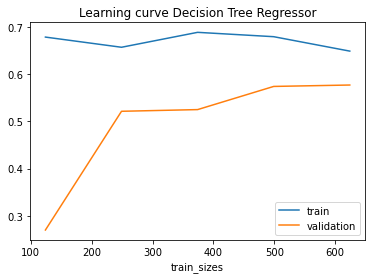

In [110]:
n, train_score, val_score = learning_curve(dt, xtrain, ytrain, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5, scoring = 'r2')
plt.plot(n, train_score.mean(axis = 1), label = "train")
plt.plot(n, val_score.mean(axis = 1), label = "validation")
plt.title("Learning curve Decision Tree Regressor")
plt.xlabel("train_sizes")
plt.legend()

In [111]:
pred = dt.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.6542123749863141

KNN

In [123]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)
knn.score(xtrain, ytrain)

0.5279076226648731

In [124]:
cross_val_score(knn, xtrain, ytrain, cv = 5, scoring = "r2").mean()

0.19015354842905266

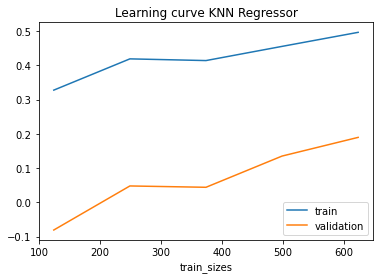

In [125]:
n, train_score, val_score = learning_curve(knn, xtrain, ytrain, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5, scoring = 'r2')
plt.plot(n, train_score.mean(axis = 1), label = "train")
plt.plot(n, val_score.mean(axis = 1), label = "validation")
plt.title("Learning curve KNN Regressor")
plt.xlabel("train_sizes")
plt.legend()

In [126]:
pred = knn.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.36950801063594274

In [127]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors" : np.arange(1, 20),
          "metric" : ["euclidean", "manhattan"]}
grid = GridSearchCV(knn, params, cv = 5)
grid.fit(xtrain, ytrain)
grid.best_score_

0.38546988406301186

In [128]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [129]:
knn = grid.best_estimator_
knn.score(xtrain, ytrain)

0.6604703341476001

In [130]:
cross_val_score(knn, xtrain, ytrain, cv = 5, scoring = "r2").mean()

0.38546988406301186

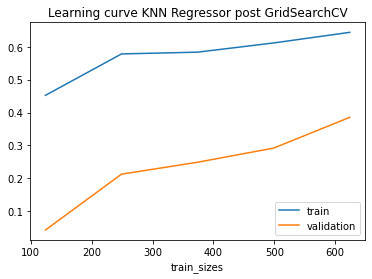

In [121]:
n, train_score, val_score = learning_curve(knn, xtrain, ytrain, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5, scoring = 'r2')
plt.plot(n, train_score.mean(axis = 1), label = "train")
plt.plot(n, val_score.mean(axis = 1), label = "validation")
plt.title("Learning curve KNN Regressor post GridSearchCV")
plt.xlabel("train_sizes")
plt.legend()

In [131]:
pred = knn.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.5422970417160982

LINEAR REGRESSION

In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtrain, ytrain)

0.6753568940364951

In [133]:
cross_val_score(lr, xtrain, ytrain, cv = 5, scoring = "r2").mean()

0.6488421750622787

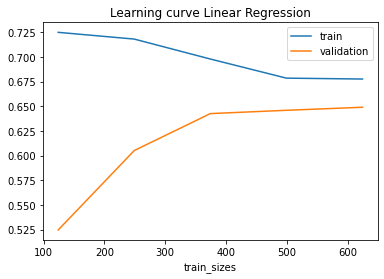

In [134]:
n, train_score, val_score = learning_curve(lr, xtrain, ytrain, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5, scoring = 'r2')
plt.plot(n, train_score.mean(axis = 1), label = "train")
plt.plot(n, val_score.mean(axis = 1), label = "validation")
plt.title("Learning curve Linear Regression")
plt.xlabel("train_sizes")
plt.legend()

In [135]:
pred = lr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.6710814607615618

Conclusion : Linear Regression works better